In [ ]:
# TO DO!
# PANEL
# Set up tabs for my information
# Set up tabs for machine learning models

In [2]:
# Imports for panel visualizations

import panel as pn
import plotly.express as px
pn.extension('plotly')
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = Path('../Data/hotel_bookings.csv')
hotel_data = pd.read_csv(file_path)
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Group by hotel and year?
grouped = hotel_data.groupby(["hotel", "arrival_date_year"])

In [5]:
avg_grouped = grouped.first()
avg_grouped.head()

is_canceled  lead_time arrival_date_month  \
hotel        arrival_date_year                                              
City Hotel   2015                         0          6               July   
             2016                         1        119            January   
             2017                         1         26            January   
Resort Hotel 2015                         0        342               July   
             2016                         0        109            January   

                                arrival_date_week_number  \
hotel        arrival_date_year                             
City Hotel   2015                                     27   
             2016                                      1   
             2017                                      1   
Resort Hotel 2015                                     27   
             2016                                      1   

                                arrival_date_day_of_month  \
hotel        arrival_date_year                              
City Hotel   2015                                       1   
             2016                                       1   
             2017                                       1   
Resort Hotel 2015                                       1   
             2016                                       1   

                                stays_in_weekend_nights  stays_in_week_nights  \
hotel        arrival_date_year                                                  
City Hotel   2015                                     0                     2   
             2016                                     0                     1   
             2017                                     1                     0   
Resort Hotel 2015                                     0                     0   
             2016                                     0                     1   

                                adults  children  babies  ... deposit_type  \
hotel        arrival_date_year                            ...                
City Hotel   2015                    1       0.0       0  ...   No Deposit   
             2016                    2       0.0       0  ...   No Deposit   
             2017                    1       0.0       0  ...   No Deposit   
Resort Hotel 2015                    2       0.0       0  ...   No Deposit   
             2016                    2       0.0       0  ...   No Deposit   

                                agent company days_in_waiting_list  \
hotel        arrival_date_year                                       
City Hotel   2015                 6.0    40.0                    0   
             2016                14.0    14.0                    0   
             2017                 9.0    40.0                    0   
Resort Hotel 2015               304.0   110.0                    0   
             2016               240.0   174.0                    0   

                                  customer_type     adr  \
hotel        arrival_date_year                            
City Hotel   2015                     Transient    0.00   
             2016                     Transient   74.25   
             2017                     Transient  128.00   
Resort Hotel 2015                     Transient    0.00   
             2016               Transient-Party   59.94   

                                required_car_parking_spaces  \
hotel        arrival_date_year                                
City Hotel   2015                                         0   
             2016                                         0   
             2017                                         0   
Resort Hotel 2015                                         0   
             2016                                         0   

                               total_of_special_requests reservation_status  \
hotel        arrival_date_year                                                
City Hotel   2015      

In [6]:
avg_grouped.hvplot.bar(x="arrival_date_year", y="lead_time", groupby="hotel")

:DynamicMap   [hotel]
   :Bars   [arrival_date_year]   (lead_time)

# Country of Origin Information

In [7]:
# Copy over the country column data to prepare new dataframe
origin_country = hotel_data["country"].copy()
# Show what has been copied
origin_country.head()

0    PRT
1    PRT
2    GBR
3    GBR
4    GBR
Name: country, dtype: object

In [8]:
# Create origin_country_df dataframe to prepare data relevant to origin country visuals
# Convert the origin country and corresponding value count into a dataframe
origin_country_df = origin_country.value_counts().to_frame()
# Rename the country column to num_of_guests
origin_country_df.rename(columns={"country":"num_of_guests"}, inplace=True)
# Display first few rows of origin_country_df
origin_country_df.head()

,num_of_guests
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287


In [9]:
# Calculate the total number of guests for the entire dataset
total_guests = origin_country_df["num_of_guests"].sum()
# Show calculated sum
total_guests

118902

In [10]:
# Add a column for the percentage of guests from each country
# Calculate the percentage of guests from each country and round to two decimals
origin_country_df["percentage_of_guests"] = round(origin_country_df["num_of_guests"] / total_guests * 100, 2)
# Dsiplay the dataframe
origin_country_df.head()

,num_of_guests,percentage_of_guests
PRT,48590,40.87
GBR,12129,10.20
FRA,10415,8.76
ESP,8568,7.21
DEU,7287,6.13


In [11]:
# Plot all data in a bar graph, x is country of origin, y is number of guests
origin_country_df.hvplot.bar(x="index", y="num_of_guests", rot=90)
# Bar graph seems to be insignificant for all countries

:Bars   [index]   (num_of_guests)

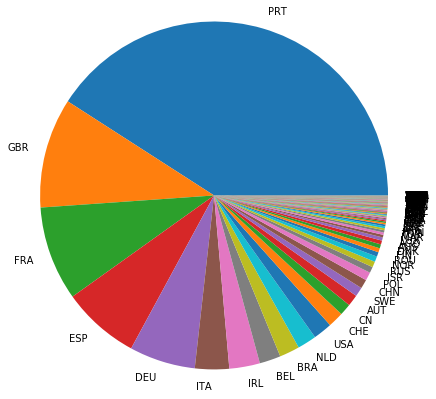

In [23]:
# Create a pie chart with the percentage of guests from each country
fig_pie = plt.figure()
plt.pie(origin_country_df["percentage_of_guests"], 
        labels = origin_country_df.index,
        radius=2.0)
# Show the plot
plt.show()

In [13]:
# Load the data that contains the longitude and latitude coordinates
# Set the file path
file_path = Path("worldcities.csv")
# Read in the csv
world_data = pd.read_csv(file_path)
# Display the data
world_data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [14]:
# Checking shape to ensure changes are updating throughout cleanup process
world_data.shape

(26569, 11)

In [15]:
# Drop the irrelevant columns for mapping ["city_ascii", "iso2", "admin_name", "capital", "id", "population", "country"]
world_data = world_data.drop(columns=["city_ascii", "iso2", "admin_name", "capital", "id", "population", "country"])

In [16]:
# Checking shape to ensure changes are updating throughout cleanup process
world_data.shape

(26569, 4)

In [17]:
# Create a list of the countries that are needed to plot
country_list = origin_country_df.index.tolist()
print(country_list)

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD', 'USA', 'CHE', 'CN', 'AUT', 'SWE', 'CHN', 'POL', 'ISR', 'RUS', 'NOR', 'ROU', 'FIN', 'DNK', 'AUS', 'AGO', 'LUX', 'MAR', 'TUR', 'HUN', 'ARG', 'JPN', 'CZE', 'IND', 'KOR', 'GRC', 'DZA', 'SRB', 'HRV', 'MEX', 'EST', 'IRN', 'LTU', 'ZAF', 'BGR', 'NZL', 'COL', 'UKR', 'MOZ', 'SVK', 'CHL', 'THA', 'SVN', 'ISL', 'LVA', 'ARE', 'TWN', 'CYP', 'SAU', 'PHL', 'TUN', 'SGP', 'IDN', 'NGA', 'EGY', 'URY', 'LBN', 'HKG', 'PER', 'MYS', 'ECU', 'BLR', 'VEN', 'CPV', 'GEO', 'JOR', 'KAZ', 'CRI', 'OMN', 'MLT', 'GIB', 'AZE', 'KWT', 'MAC', 'QAT', 'PAK', 'DOM', 'IRQ', 'BIH', 'PRI', 'ALB', 'MDV', 'BGD', 'SEN', 'CMR', 'BOL', 'MKD', 'TJK', 'GNB', 'PAN', 'VNM', 'CUB', 'LBY', 'JEY', 'ARM', 'MUS', 'AND', 'LKA', 'KEN', 'JAM', 'CIV', 'BHR', 'FRO', 'MNE', 'CAF', 'SUR', 'TZA', 'PRY', 'GHA', 'GAB', 'UZB', 'MCO', 'BRB', 'GTM', 'ZWE', 'GGY', 'BEN', 'TMP', 'LIE', 'ETH', 'SYR', 'SLV', 'ZMB', 'MYT', 'COM', 'ATA', 'MWI', 'UGA', 'KHM', 'RWA', 'STP', 'IMN', 'KNA', 'SYC',

In [18]:
# Update the dataframe to remove the countries that are not needed
map_data_df = world_data[world_data["iso3"].isin(country_list) == True]
# Display the dataframe
map_data_df.head()

,city,lat,lng,iso3
0,Tokyo,35.6897,139.6922,JPN
1,Jakarta,-6.2146,106.8451,IDN
2,Delhi,28.6600,77.2300,IND
3,Mumbai,18.9667,72.8333,IND
4,Manila,14.5958,120.9772,PHL


In [19]:
# Drop the duplicate countries using the "iso3" column as the subset criteria
# Keep the first instance of data, for simplicity plot one city for each country
map_data_df.drop_duplicates(subset="iso3", keep="first", inplace=True)
# Checking shape to ensure changes are updating throughout cleanup process
map_data_df.shape

(169, 4)

In [20]:
# Display the dataframe
map_data_df.head()

,city,lat,lng,iso3
0,Tokyo,35.6897,139.6922,JPN
1,Jakarta,-6.2146,106.8451,IDN
2,Delhi,28.6600,77.2300,IND
4,Manila,14.5958,120.9772,PHL
5,Shanghai,31.1667,121.4667,CHN


In [21]:
# Using hvplot and geoviews, plot the relevant coordinates
map_data_df.hvplot.points("lng", "lat", geo=True, color="yellow", alpha=0.5, tiles="ESRI", size=200)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]

In [22]:
# Replace with hotel data and have functions that return figures, plots, etc.

# avg_data = pn.Row(average_gross_rent(), average_sales_price())
# yearly_data = pn.Column("replace with relevant hotel information")
# column_of_ML_model_1 = pn.Column(replace with ML model 1 information)
# neighborhood_data = pn.Column(column_of_neighborhood) 
# world_map_data = pn.Column(world_map()) 


# panel = pn.Tabs(
#    ("Yearly Market", yearly_data),   
#    ("Country of Origin Map", world_map_data),
#    ("ML model 1 Analysis", ML_model_1_data),
# )

In [ ]:
# Serve the Panel dashboard

# panel.servable()